# Forecasting III: multivariate, hierarchical

This tutorial covers multivariate and hierarchical time series modeling with the [pyro.contrib.forecast](http://docs.pyro.ai/en/latest/contrib.forecast.html) module. This tutorial assumes the reader is already familiar with [SVI](http://pyro.ai/examples/svi_part_ii.html), [tensor shapes](http://pyro.ai/examples/tensor_shapes.html), and [univariate forecasting](http://pyro.ai/examples/forecasting_i.html).

#### Summary

- 

In [3]:
import math
import torch
import pyro
import pyro.distributions as dist
import pyro.poutine as poutine
from pyro.contrib.examples.bart import load_bart_od
from pyro.contrib.forecast import ForecastingModel, Forecaster, eval_crps
from pyro.infer.reparam import LinearHMMReparam, StableReparam, SymmetricStableReparam
from pyro.ops.tensor_utils import periodic_repeat
from pyro.ops.stats import quantile
import matplotlib.pyplot as plt

%matplotlib inline
assert pyro.__version__.startswith('1.2.1')
pyro.enable_validation(True)
pyro.set_rng_seed(20200305)

Let's again look at the [BART train](https://www.bart.gov/about/reports/ridership) ridersip dataset:

In [2]:
dataset = load_bart_od()
print(dataset.keys())
print(dataset["counts"].shape)
print(" ".join(dataset["stations"]))

dict_keys(['stations', 'start_date', 'counts'])
torch.Size([78888, 50, 50])
12TH 16TH 19TH 24TH ANTC ASHB BALB BAYF BERY CAST CIVC COLM COLS CONC DALY DBRK DELN DUBL EMBR FRMT FTVL GLEN HAYW LAFY LAKE MCAR MLBR MLPT MONT NBRK NCON OAKL ORIN PCTR PHIL PITT PLZA POWL RICH ROCK SANL SBRN SFIA SHAY SSAN UCTY WARM WCRK WDUB WOAK


## Multivariate time series

Let's start by modeling arrivals to Embarcadero station, from each of the other 50 stations. Note this is nine years of hourly data, so the dataset is quite long.

torch.Size([78888, 50])


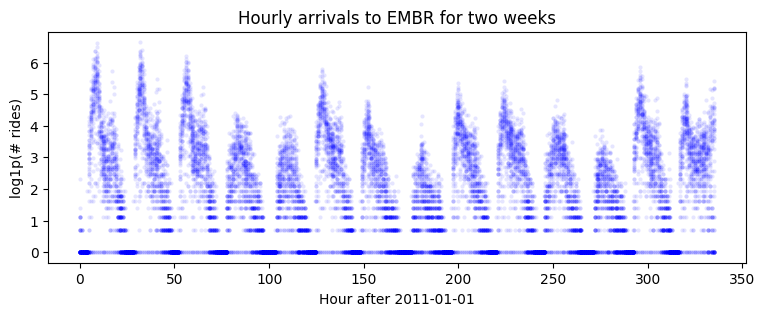

In [13]:
T, O, D = dataset["counts"].shape
data = dataset["counts"][:, :, dataset["stations"].index("EMBR")].log1p()
print(data.shape)
plt.figure(figsize=(9, 3))
plt.plot(data[-24 * 7 * 2:], 'b.', alpha=0.1, markeredgewidth=0)
plt.title("Hourly arrivals to EMBR for two weeks")
plt.ylabel("log1p(# rides)")
plt.xlabel("Hour after 2011-01-01");

The most naive model might treat each of the time series independently.

In [14]:
class Model1(ForecastingModel):
    def model(self, zero_data, covariates):
        duration, data_dim = zero_data.shape
        freature_dim = covariates.size(-1)

        # TODO

## Hierarchical time series

## Subsampling